### IMPORT PACKAGES


In [200]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from DataLoader import DataLoader


### Loading Dataset



In [201]:
dl = DataLoader('dataset') 
users_chosen = dl.config['users_chosen']

GET SLEEP DATA

In [202]:
#data is in json format

sleep_path= os.getcwd() + dl.config["sleep_data_path"]
files = os.listdir(sleep_path)
sleep_data = pd.DataFrame(columns=["user_id", "hour", "resp_time"])
files_chosen_sleep=[] #list with choosen files by id
files_id_sleep ={} #dictionary key= filename value= fileid


#see what files we need to open and save the files and the user id
for file in files:
    
    user_id = int(file.split('u')[1].split('.')[0])
   
    if user_id in users_chosen:
        files_chosen_sleep.append(file)
        files_id_sleep[file]= user_id

    # now get the data from json
for file in files_chosen_sleep:
    with open(sleep_path + "/"+ file) as s:
        ds= pd.read_json(s)
        ds = ds[['resp_time', 'hour']]
        ds['user_id']= files_id_sleep[file]
        
        # drop nan values in the 'duration' column
        ds = ds.dropna(subset=['hour'])

        #rename hour column
        ds = ds.rename(columns={"hour": "sleep_duration"})
        
        #create date and hour columns
        ds['date'] = ds['resp_time'].dt.date
        ds['hour'] = ds['resp_time'].dt.hour
        
        #eliminate duplicates
        ds=ds.drop_duplicates(subset=['date','user_id'])
        
        #eliminamos resp_time y hour 
        ds=ds.drop(columns=['resp_time', 'hour'])
        
        #add the data to the dataframe
        
        sleep_data = pd.concat([sleep_data if not sleep_data.empty else None, ds], ignore_index=True)
  

GET BIGFIVE DATA

In [203]:
# the data is in csv format
bigfive_path = os.getcwd() + dl.config["bigfive_data_path"]
bigfive= pd.read_csv(bigfive_path)

# from third column, change name of the column to numbers from 1 to 44
bigfive.columns = ['uid' , 'type'] + [i for i in range(1, 45)]

# change survey values
for i in range(1, 45):
    bigfive.loc[bigfive[i] == 'Disagree Strongly', i] = 1
    bigfive.loc[bigfive[i] == 'Disagree a little', i] = 2
    bigfive.loc[bigfive[i] == 'Neither agree nor disagree', i] = 3
    bigfive.loc[bigfive[i].isna(), i] = 3
    bigfive.loc[bigfive[i] == 'Agree a little', i] = 4
    bigfive.loc[bigfive[i] == 'Agree strongly', i] = 5

#estas formulas ni idea de donde salen
bigfive['extraversion'] = bigfive[1] - bigfive[6] + bigfive[11] + bigfive[16] - bigfive[21] + bigfive[26] - bigfive[31] + bigfive[36]
bigfive['agreeableness'] = - bigfive[2] + bigfive[7] - bigfive[12] + bigfive[17] + bigfive[22] - bigfive[27] + bigfive[32] - bigfive[37] + bigfive[42]
bigfive['conscientiousness'] = bigfive[3] - bigfive[8] + bigfive[13] - bigfive[18] - bigfive[23] + bigfive[28] + bigfive[33] + bigfive[38] - bigfive[43]
bigfive['neuroticism'] = bigfive[4] - bigfive[9] + bigfive[14] + bigfive[19] - bigfive[24] + bigfive[29] - bigfive[34] + bigfive[39]
bigfive['openness'] = bigfive[5] + bigfive[10] + bigfive[15] + bigfive[20] + bigfive[25] + bigfive[30] - bigfive[35] + bigfive[40] - bigfive[41] + bigfive[44]

bigfive_data = bigfive[bigfive['type'] == 'pre']

#AQUI NO DEBERIAMOS MANTENER SOLO LO NECESARIO? 
# da error si quitamos nans y limpiamos datos, 
# #mejor al final hacer limpieza general

#prueba : quitar columnas innecesarias para mejora de modelo 
bigfive_data = bigfive_data[['uid','type','extraversion','agreeableness','conscientiousness','neuroticism','openness']]


GET FLOURISHING DATA

In [204]:
# the data is in csv format

flourishing_path = os.getcwd() + dl.config["flourishing_data_path"]
flourishing= pd.read_csv(flourishing_path)


# from third column, change name of the column to numbers from 1 to 8
flourishing.columns = ['uid' , 'type'] + [i for i in range(1, 9)]

flourishing['flourishing_score'] = flourishing[1] - flourishing[2] + flourishing[3] + flourishing[4] + flourishing[5] + flourishing[6] + flourishing[7] + flourishing[8]

flourishing_data= flourishing[flourishing['type'] == 'pre']
#aqui hay Nan ¿no se deberia tratar?
#nota si limpiamos los nan ahora da error en stress data, mejor limpiarlo ahi
#prueba : limpiar columnas 
flourishing_data = flourishing_data [['uid','type','flourishing_score']]
#no empeora, evitamos datos inutiles


GET LONLINESS DATA

In [205]:
loneliness_path= os.getcwd() +dl.config["loneliness_data_path"]
loneliness = pd.read_csv(loneliness_path)

 # from third column, change name of the column to numbers from 1 to 20
loneliness.columns = ['uid' , 'type'] + [i for i in range(1, 21)]

 # change cell values from 'Agree a little' to 4
for i in range(1, 21):
    loneliness.loc[loneliness[i] == 'Often', i] = 3
    loneliness.loc[loneliness[i] == 'Sometimes', i] = 2
    loneliness.loc[loneliness[i] == 'Rarely', i] = 1
    loneliness.loc[loneliness[i] == 'Never', i] = 0
#get loneliness score ver de donde salen estas formulas
loneliness['loneliness_score'] = loneliness[1] + loneliness[2] + loneliness[3] + loneliness[4] \
            + loneliness[5] + loneliness[6] + loneliness[7] + loneliness[8] + loneliness[9] + loneliness[10] \
            + loneliness[11] + loneliness[12] + loneliness[13] + loneliness[14] + loneliness[15] + loneliness[16] \
            + loneliness[17] + loneliness[18] + loneliness[19] + loneliness[20]

loneliness_data= loneliness[loneliness['type'] == 'pre']

#DUDA AQUI POR QUE NO ELIMINAMOS TODO SALVO LONELINESS_SCORE
#prueba eliminar todo salvo loneliness_score
loneliness_data = loneliness_data[['uid','type','loneliness_score']]
#no empeoran datos --> las eliminamos para tener menos info inutil


GET CLASS DATA

In [206]:
class_path = os.getcwd() + dl.config["class_data_path"]
files_class = os.listdir(class_path)
files_chosen_class= []
files_id_class={}
class_data= pd.DataFrame(columns=["user_id", "class_level", "resp_time"])

for file in files_class:
    
    user_id = int(file.split('u')[1].split('.')[0])
    
    if user_id in users_chosen:
        files_chosen_class.append(file)
        files_id_class[file]=user_id

for file in files_chosen_class:
    with open(class_path+ "/"+ file) as s:
        
        ds= pd.read_json(s)
        ds['user_id']= files_id_class[file]
        #drop nan
        ds=ds.dropna(subset=['hours'])
        
        #renames
        ds= ds.rename(columns={"hours": "work_hours"})
        ds= ds.rename(columns={"due": "exam_day"})
        
        # create columns date and hour 
        ds['date']=ds['resp_time'].dt.date
        ds['hour']=ds['resp_time'].dt.hour
        
        #reasignamos los valores
        #"[1]neutral, [2]strongly agree, [3]agree, [4] disagree, [5]strong disagree, "
        ds['experience'] = ds['experience'].apply(lambda x: 1 if x == 5 else 2 if x == 4 else 3 if x == 1 else 4 if x == 3 else 5)
        # 1=[5]strong disagree, 2=[4] disagree, 3=[1]neutral ,4=[3]agree,5=[2]strongly agree
        #delete hour and resp time
        ds= ds.drop(columns=['hour','resp_time'])
        #add data
        class_data = pd.concat([class_data if not class_data.empty else None, ds], ignore_index=True)

class_data= class_data.drop(['null','location','course_id'],axis=1)


GET SOCIAL DATA

In [207]:
social_path = os.getcwd() + dl.config['social_data_path']
files_social = os.listdir(social_path)
files_chosen_social=[]
files_id_social ={}
social_data = pd.DataFrame(columns=['user_id','social_level','resp_time'])


for file in files_social:
    
    user_id = int(file.split('u')[1].split('.')[0])
    
    if user_id in users_chosen:
        files_chosen_social.append(file)
        files_id_social[file]=user_id


for file in files_chosen_social:
    with open(social_path + '/'+ file) as d:
        ds= pd.read_json(d)
        ds=ds[['resp_time','number']]
        ds['user_id']=files_id_social[file]
        
        ds=ds.dropna(subset=['number'])
        
        ds=ds.rename(columns={'number':'social_level'})
        
        ds['date']= ds['resp_time'].dt.date
        ds.drop_duplicates(subset=['date'], inplace=True, keep='last')
        
        ds=ds.drop(columns=['resp_time'])
        
        social_data = pd.concat([social_data if not social_data.empty else None, ds], ignore_index=True)



GET CONVERSATIONS DATA


In [208]:
conversation_path= os.getcwd() + dl.config['conversation_data_path']

files_conversation= os.listdir(conversation_path)
files_chosen_conversation=[]
files_id_conversation={}
conversation_data = pd.DataFrame(columns=["user_id", "date", "social_voice_sum", "social_voice_count", "social_voice_mean", "social_voice_max"])

for file in files_conversation:
    user_id = int(file.split('u')[1].split('.')[0])
    
    if user_id in users_chosen:
        files_chosen_conversation.append(file)
        files_id_conversation[file]=user_id

for file in files_chosen_conversation:
    with open(conversation_path + '/' + file) as c:
        dc= pd.read_csv(c)
        #create date and duration columns and delete non needed columns
        dc['date']= pd.to_datetime(dc['start_timestamp'],unit='s').dt.date
        
        dc['user_id'] = files_id_conversation[file]
       
        dc['duration']= (dc[' end_timestamp']- dc['start_timestamp'])
        
        dc.drop(['start_timestamp',' end_timestamp'], axis=1, inplace=True)
        # group data by date and calculate sum max and mean of each date
        
        dc=dc.groupby(['date','user_id'],observed=False,as_index=False).agg(social_voice_sum=('duration', 'sum'), social_voice_count=('duration', 'count'), social_voice_mean=('duration', 'mean'), social_voice_max=('duration', 'max'))
        
        conversation_data = pd.concat([conversation_data if not conversation_data.empty else None, dc], ignore_index=True)



STRESS DATA

In [209]:
stress_path = os.getcwd() + dl.config["stress_data_path"]
files= os.listdir(stress_path)
files_chosen=[]
files_id ={}
stress_data = pd.DataFrame(columns=["user_id","stress_level", "resp_time"])
# level = 'day'

# we must obtain the data from a json file

for file in files:
    
    user_id = int(file.split('u')[1].split('.')[0])
    
    if user_id in users_chosen:
        files_chosen.append(file)
        files_id[file]= user_id
        
# now we get the data 

for file in files_chosen:
    with open(stress_path + "/"+ file) as f:
        df = pd.read_json(f)
        user_name = file.split(".")[0].split("_")[-1]
        
        # we discart location and null , they dont give info about stress
        df= df[['resp_time', 'level']]
        df['user_id']= files_id[file]
        
        #eliminate rows with NaN values in level and rename it
        df= df.dropna(subset=['level'])
        df = df.rename(columns={"level": "stress_level"})
        
        # separamos resp_time en hora y fecha
        df['date'] = df['resp_time'].dt.date
        df['hour'] = df['resp_time'].dt.hour
        
        #reasignamos los valores de estres
        df['stress_level'] = df['stress_level'].astype(int)
        #"[1]A little stressed, [2]Definitely stressed, [3]Stressed out, [4]Feeling good, [5]Feeling great, "
        #df['stress_level'] = df['stress_level'].apply(lambda x: 1 if x == 5 else 2 if x == 4 else 3 if x == 1 else 4 if x == 3 else 5)
        
        # 5 -> 1 , 4->2, 1->3, 3->4, the rest(2) ->5 
        # 1=[5]Feeling great, 2 =[4]Feeling good, 3 = [1]A little stressed, 4 = [3]Stressed out, 5 = [2]Definitely stressed
        
        
        #testing to reduce to 3 levels of stress
        df['stress_level'] = df['stress_level'].apply(lambda x: 1 if (x == 2 or x== 3) else 2 if x == 1 else 3 ) 

    
        #eliminamos duplicados
        #df.drop_duplicates(subset=['stress_level','date','hour','user_id'])
        
        #get average stress of the day and round it 
        #if level == 'day':
        df['stress_level'] = df.groupby(['date'])['stress_level'].transform(lambda x: x.mean().round())
        df.drop_duplicates(subset=['date'])
        #a esto de los intervalos no le veo sentido, en el estudio usaban 24 datos al dia == numero de horas en un dia
        """elif level== 'interval':
            df['interval'] = df['hour'].apply(lambda x: 1 if x < 12 else 2 if x >= 9 and x < 6 else 3)
        """
        #aqui mezclamos la info del tiempo con la del estress
        """
        aqui hay que meter el weather_data, bigfive_data,flourishing_data
        loneliness_data, y demas data que consideremos
        
        """
        
        #delete hour and rep time
        df=df.drop(['hour','resp_time'],axis=1)
        #"""
        #get bigfivedata
       
        df['extraversion'] = bigfive_data[bigfive_data['uid']== user_name]['extraversion'].iloc[0]
        df['agreeableness'] = bigfive_data[bigfive_data['uid']== user_name]['agreeableness'].iloc[0]
        df['neuroticism'] = bigfive_data[bigfive_data['uid']== user_name]['neuroticism'].iloc[0]
        df['openness'] = bigfive_data[bigfive_data['uid']== user_name]['openness'].iloc[0]
        df['conscientiousness'] = bigfive_data[bigfive_data['uid']== user_name]['conscientiousness'].iloc[0]

        #get flourishing data
        df['flourishing_score'] = flourishing_data[flourishing_data['uid'] == user_name]['flourishing_score'].iloc[0]
        
        #get loneliness data
        df['loneliness_score'] = loneliness[loneliness['uid'] == user_name]['loneliness_score'].iloc[0]
        #"""
        #add to df
        stress_data = pd.concat([stress_data if not stress_data.empty else None, df], ignore_index=True)



MERGE DATA

In [210]:
#data_frames = [stress_data, social_data, sleep_data, conversation_data]

final_data= pd.merge(stress_data,social_data,on=['user_id','date'],how='outer')
final_data= pd.merge(final_data,sleep_data,on=['user_id','date'],how='outer')
final_data= pd.merge(final_data,conversation_data,on=['user_id','date'],how='outer')

final_data



,stress_level,user_id,date,extraversion,agreeableness,neuroticism,openness,conscientiousness,flourishing_score,loneliness_score,social_level,sleep_duration,social_voice_sum,social_voice_count,social_voice_mean,social_voice_max
0,1.0,0,2013-03-25,12.0,2.0,7.0,33.0,3.0,NaN,31.0,NaN,8.0,NaN,NaN,NaN,NaN
1,1.0,0,2013-03-26,12.0,2.0,7.0,33.0,3.0,NaN,31.0,1.0,8.0,NaN,NaN,NaN,NaN
2,1.0,0,2013-03-26,12.0,2.0,7.0,33.0,3.0,NaN,31.0,1.0,8.0,NaN,NaN,NaN,NaN
3,2.0,0,2013-03-27,12.0,2.0,7.0,33.0,3.0,NaN,31.0,4.0,8.0,22971.0,21.0,1093.857143,5829.0
4,2.0,0,2013-03-28,12.0,2.0,7.0,33.0,3.0,NaN,31.0,3.0,6.0,20902.0,21.0,995.333333,4165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3560,3.0,59,2013-06-05,14.0,13.0,5.0,23.0,-1.0,33.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
3561,3.0,59,2013-06-05,14.0,13.0,5.0,23.0,-1.0,33.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
3562,3.0,59,2013-06-06,14.0,13.0,5.0,23.0,-1.0,33.0,34.0,3.0,15.0,NaN,NaN,NaN,NaN
3563,3.0,59,2013-06-06,14.0,13.0,5.0,23.0,-1.0,33.0,34.0,3.0,15.0,NaN,NaN,NaN,NaN


CLEANING DATA

In [211]:
#generate a copy to clean data 

df=final_data.copy()
df['date']= pd.to_datetime(df['date'])
#define date as index to allow easier grouping
df.set_index('date',inplace=True)
df=df.dropna(subset=['stress_level'])

#los datos no estan limpios, hay que balancearlos y hacer una limpieza de nans


NANs TREATMENT

In [212]:
#OPCION1    MICE imputer
from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
#imputer = IterativeImputer(max_iter=10,random_state=42)
#df_imputed_values= imputer.fit_transform(df)
#df_imputed= pd.DataFrame(df_imputed_values, columns= df.columns, index=df.index)



In [213]:
#OPTION 2 KNN imputer (K-Nearest Neighbors Imputation)

from fancyimpute import KNN

#knn_imputer = KNN(k=5) # k==n_neighbours
#df_imputedk= knn_imputer.fit_transform(df)
#df_imputedk= pd.DataFrame(df_imputedk,columns=df.columns, index=df.index,)


In [214]:
#OPTION 3
df=df.dropna()
df

,stress_level,user_id,extraversion,agreeableness,neuroticism,openness,conscientiousness,flourishing_score,loneliness_score,social_level,sleep_duration,social_voice_sum,social_voice_count,social_voice_mean,social_voice_max
date,,,,,,,,,,,,,,,
2013-03-27,3.0,1,7.0,10.0,4.0,27.0,16.0,33.0,34.0,2.0,7.0,12201.0,12.0,1016.750000,3045.0
2013-03-29,2.0,1,7.0,10.0,4.0,27.0,16.0,33.0,34.0,4.0,7.0,37867.0,45.0,841.488889,4460.0
2013-03-30,2.0,1,7.0,10.0,4.0,27.0,16.0,33.0,34.0,3.0,8.0,25678.0,24.0,1069.916667,7412.0
2013-03-30,2.0,1,7.0,10.0,4.0,27.0,16.0,33.0,34.0,3.0,8.0,25678.0,24.0,1069.916667,7412.0
2013-03-31,2.0,1,7.0,10.0,4.0,27.0,16.0,33.0,34.0,4.0,8.0,23377.0,36.0,649.361111,3621.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-05-29,1.0,59,14.0,13.0,5.0,23.0,-1.0,33.0,34.0,4.0,4.0,33526.0,122.0,274.803279,4833.0
2013-05-29,1.0,59,14.0,13.0,5.0,23.0,-1.0,33.0,34.0,4.0,4.0,33526.0,122.0,274.803279,4833.0
2013-05-29,1.0,59,14.0,13.0,5.0,23.0,-1.0,33.0,34.0,4.0,4.0,33526.0,122.0,274.803279,4833.0


PRUEBAS MODELOS

Gradient Boosting Classifier

Cross-validation accuracy scores: [0.88059701 0.84577114 0.84079602 0.885      0.78      ]
Average cross-validation accuracy: 0.8464328358208956
Test Scores (Accuracy): [0.88059701 0.84577114 0.84079602 0.885      0.78      ]
Precision (Macro): [0.87554598 0.77898363 0.84021062 0.84803922 0.75943029]
Recall (Macro): [0.85256769 0.80388935 0.76639258 0.82756133 0.71882518]
Fit Times: [1.68874121 1.86697197 1.77788687 1.76431441 1.78332806]
Accuracy: 0.8805970149253731
Classification Report:
               precision    recall  f1-score   support

         1.0       0.90      0.83      0.86        42
         2.0       0.89      0.92      0.91       119
         3.0       0.84      0.80      0.82        40

    accuracy                           0.88       201
   macro avg       0.88      0.85      0.86       201
weighted avg       0.88      0.88      0.88       201



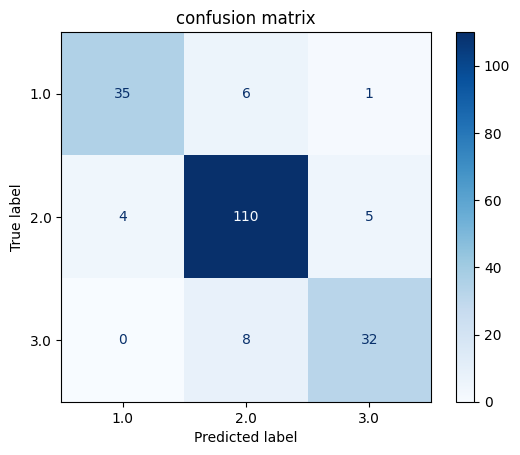

In [215]:
#import libraries 

from sklearn.model_selection import train_test_split,cross_val_score,cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import KFold
#define features

#weights = {1:17.4, 2:1.4829, 3:1, 4:2.54, 5:5.674}
X= df.drop('stress_level', axis= 1)
y= df['stress_level']
#rus = RandomUnderSampler(random_state=42)
#for MICE and KNN Imputation
#y = y.astype(int)

#split data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#apply weights 
#sample_weights = np.array([weights[label] for label in y_train])

#apply undersampling
#X_res,y_res = rus.fit_resample(X_train,y_train)

#initialize model
classifier = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1,random_state=42)

#cross-validate be carefull to not make testing bigger than 20% of total data
# KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision_macro', 'recall_macro']
results = cross_val_score(classifier, X, y, cv=kf, scoring='accuracy')

print(f'Cross-validation accuracy scores: {results}')
print(f'Average cross-validation accuracy: {results.mean()}')

#cross_validation
results_multi = cross_validate(classifier, X, y, cv=kf, scoring=scoring)

print(f"Test Scores (Accuracy): {results_multi['test_accuracy']}")
print(f"Precision (Macro): {results_multi['test_precision_macro']}")
print(f"Recall (Macro): {results_multi['test_recall_macro']}")
print(f"Fit Times: {results_multi['fit_time']}")
#adjusting model

#classifier.fit(X_train,y_train,sample_weight=sample_weights)
classifier.fit(X_train,y_train)
#classifier.fit(X_res,y_res)

#evaluate model
n=Counter(y_train)
#print(n[1],n[2],n[3],n[4],n[5])
y_pred = classifier.predict(X_test)
print('Accuracy:', accuracy_score(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#confusion matrix

cm= confusion_matrix(y_test,y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot(cmap='Blues')
plt.title('confusion matrix')
plt.show()




Random Forest Classifier

Cross-validation accuracy scores: [0.87562189 0.86567164 0.87562189 0.88       0.815     ]
Average cross-validation accuracy: 0.8623830845771143
Test Scores (Accuracy): [0.87562189 0.86567164 0.87562189 0.88       0.815     ]
Precision (Macro): [0.875323   0.80555556 0.89049477 0.83586098 0.79807034]
Recall (Macro): [0.82843137 0.82006869 0.82527635 0.81922799 0.76474603]
Fit Times: [0.81470942 0.75086975 0.5643332  0.58413672 0.58514261]
Accuracy: 0.8756218905472637
Classification Report:
               precision    recall  f1-score   support

         1.0       0.92      0.79      0.85        42
         2.0       0.88      0.95      0.91       119
         3.0       0.83      0.75      0.79        40

    accuracy                           0.88       201
   macro avg       0.88      0.83      0.85       201
weighted avg       0.88      0.88      0.87       201



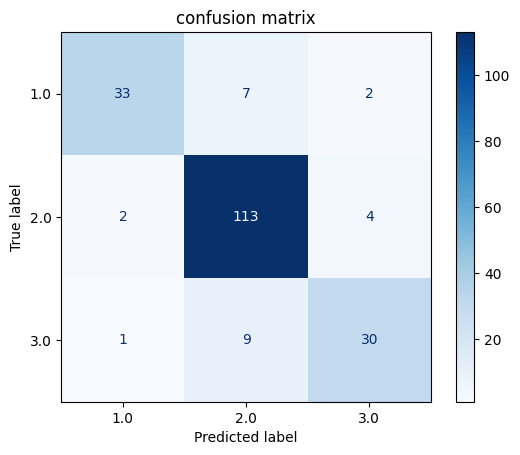

In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

#weights = {1:17.4, 2:1.4829, 3:1, 4:2.54, 5:5.674}

#define features

X= df.drop('stress_level', axis= 1)
y= df['stress_level']

#for MICE and KNN Imputation

#y = y.astype(int)



#split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#apply weights 
#sample_weights = np.array([weights[label] for label in y_train])

#apply undersampling
#X_res,y_res = rus.fit_resample(X_train,y_train)

#initialize model
rf_classifier = RandomForestClassifier(n_estimators=300,random_state=42)
#rf_classifier = RandomForestClassifier(n_estimators=300,random_state=42,class_weight='balanced')
#cross-val-score be carefull to not make testing bigger than 20% of total data
# KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision_macro', 'recall_macro']
results = cross_val_score(rf_classifier, X, y, cv=kf, scoring='accuracy')

print(f'Cross-validation accuracy scores: {results}')
print(f'Average cross-validation accuracy: {results.mean()}')

#cross_validation
results_multi = cross_validate(rf_classifier, X, y, cv=kf, scoring=scoring)

print(f"Test Scores (Accuracy): {results_multi['test_accuracy']}")
print(f"Precision (Macro): {results_multi['test_precision_macro']}")
print(f"Recall (Macro): {results_multi['test_recall_macro']}")
print(f"Fit Times: {results_multi['fit_time']}")

rf_classifier.fit(X_train,y_train)
#rf_classifier.fit(X_res,y_res)
#rf_classifier.fit(X_train,y_train,sample_weight=sample_weights)

#evaluate model
y_pred = rf_classifier.predict(X_test)
print('Accuracy:', accuracy_score(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#confusion matrix

cm= confusion_matrix(y_test,y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot(cmap='Blues')
plt.title('confusion matrix')
plt.show()

k-Nearest Neighbors (k-NN)

from sklearn.neighbors import KNeighborsClassifier

#define features

X= df_imputedk.drop('stress_level', axis= 1)
y= df_imputedk['stress_level']

#for MICE Imputation

y = y.astype(int)

#split data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


#apply undersampling
X_res,y_res = rus.fit_resample(X_train,y_train)

#initialize model
knn_classifier= KNeighborsClassifier(n_neighbors=5,weights='distance') 

#cross-val-score be carefull to not make testing bigger than 20% of total data
# KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision_macro', 'recall_macro']
results = cross_val_score(knn_classifier, X, y, cv=kf, scoring='accuracy')

print(f'Cross-validation accuracy scores: {results}')
print(f'Average cross-validation accuracy: {results.mean()}')

#cross_validation
results_multi = cross_validate(knn_classifier, X, y, cv=kf, scoring=scoring)

print(f"Test Scores (Accuracy): {results_multi['test_accuracy']}")
print(f"Precision (Macro): {results_multi['test_precision_macro']}")
print(f"Recall (Macro): {results_multi['test_recall_macro']}")
print(f"Fit Times: {results_multi['fit_time']}")

#evaluate model
#knn_classifier.fit(X_train, y_train)
knn_classifier.fit(X_res,y_res)
y_pred= knn_classifier.predict(X_test)

print('Accuracy:', accuracy_score(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


#confusion matrix

cm= confusion_matrix(y_test,y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot(cmap='Blues')
plt.title('confusion matrix')
plt.show()

Multilayer Perceptron (MLP)

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Assuming df is already defined and loaded

#define features
X = df.drop('stress_level', axis=1)
y = df['stress_level']

# Handle class imbalance if necessary
# rus = RandomUnderSampler(random_state=42)
# X, y = rus.fit_resample(X, y)

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#data scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#initialize model
mlp = MLPClassifier(hidden_layer_sizes=(1000, 500), activation='relu', solver='adam', max_iter=1000, alpha=0.0001, learning_rate='adaptive', random_state=42, batch_size='auto')

#cross-val-score be careful to not make testing bigger than 20% of total data
# KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision_macro', 'recall_macro']
results = cross_val_score(mlp, X, y, cv=kf, scoring='accuracy')

print(f'Cross-validation accuracy scores: {results}')
print(f'Average cross-validation accuracy: {results.mean()}')

#cross_validation
results_multi = cross_validate(mlp, X, y, cv=kf, scoring=scoring)

print(f"Test Scores (Accuracy): {results_multi['test_accuracy']}")
print(f"Precision (Macro): {results_multi['test_precision_macro']}")
print(f"Recall (Macro): {results_multi['test_recall_macro']}")
print(f"Fit Times: {results_multi['fit_time']}")

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

SGDCClassifier (Stochastic Gradient Descent Classifier)
RESULTADOS HORRIBLES

from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline

#define features

X= df.drop('stress_level', axis= 1)
y= df['stress_level']

#split data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

pipeline = make_pipeline(StandardScaler(), SGDClassifier(loss='log_loss',max_iter=1000, random_state=42))

pipeline.fit(X_train,y_train)

y_pred = pipeline.predict(X_test)

print('Accuracy:', accuracy_score(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Long short-term memory (LSTM) (is recurrent neural network RNN)

Support Vector Machine(SVM) tarda 15 min en ejecutarse y no llega ni al 50% de precision



autoencoder(unsupervised)